<a href="https://colab.research.google.com/github/rsidorchuk93/images/blob/main/Images_similarity_scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculate similarity scores in photos to detect duplicates

In [1]:
# connecting to Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from skimage import feature, io, transform
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
folder_path = "/content/drive/My Drive/photoshoot/labeled_photos"

In [5]:
os.listdir(folder_path)[:10]

['ps7p62ge7k0k0z71.jpg',
 'pn0cfcw0o0884k0s.jpg',
 'p2ykelck04cgw44g.jpg',
 'p6rjw1kwkccgg44o.jpg',
 'pfzkaaog8484ccc8.jpg',
 'pqrv18fhujfg57yp.jpg',
 'ppfzeg0kkkco4koc.jpg',
 'plzrca8klwzk1heg.jpg',
 'p9i2yxcck800gcsg.jpg',
 'pmvini684s840s0c.jpg']

In [14]:
# list all files in the directory that end with .jpg
jpg_files = [filename for filename in os.listdir(folder_path) if filename.endswith('.jpg')]
len(jpg_files)

65

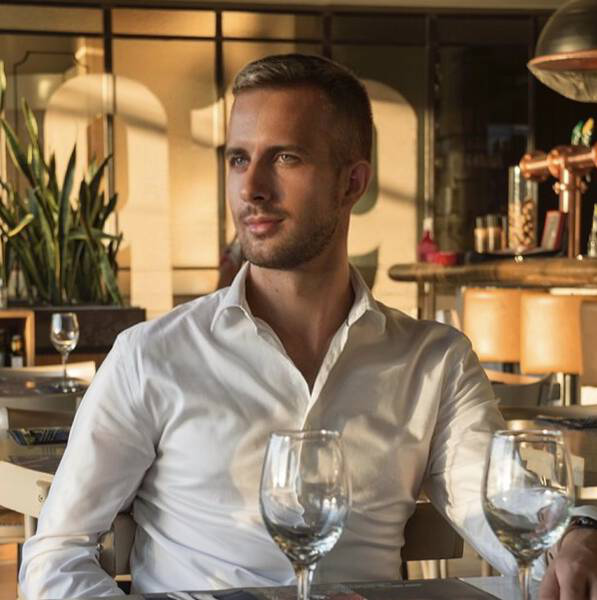

In [15]:
# open the first JPG file in the list using Pillow
img = Image.open(os.path.join(folder_path, jpg_files[0]))

# display the image using Pillow
img.show()

In [26]:
# set the size to resize each image to
resize_size = (256, 256)

# calculate HOG feature vectors for each image
hog_features = []
for filename in jpg_files:
    img = io.imread(os.path.join(folder_path, filename), as_gray=True)
    img_resized = transform.resize(img, resize_size, anti_aliasing=True)
    hog_feature = feature.hog(img_resized)
    hog_features.append(hog_feature)

# calculate similarity scores between each pair of images
similarity_scores = []
for i in range(len(jpg_files)):
    for j in range(i+1, len(jpg_files)):
        similarity_score = cosine_similarity([hog_features[i]], [hog_features[j]])[0][0]
        similarity_scores.append((jpg_files[i], jpg_files[j], similarity_score))

len(similarity_scores)

2080

In [27]:
# print the similarity scores to the console
similarity_scores[0]

('ps7p62ge7k0k0z71.jpg', 'pn0cfcw0o0884k0s.jpg', 0.44007377658911295)

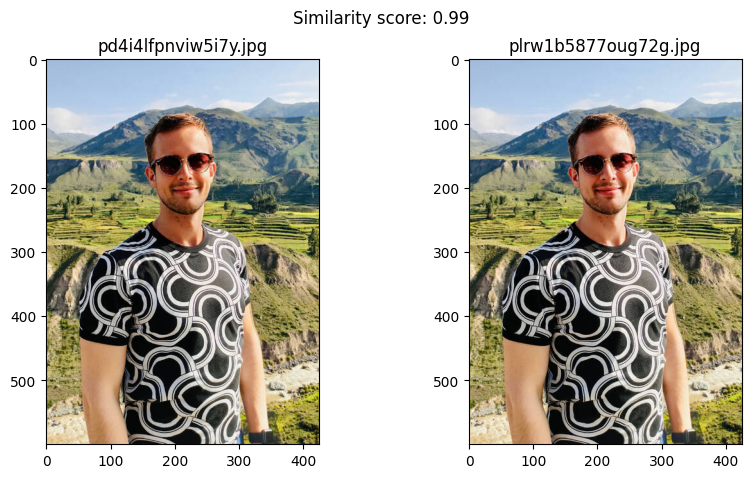

In [48]:
# Sort the similarity scores in descending order
sorted_scores = sorted(similarity_scores, key=lambda x: x[2], reverse=True)

# Select the top 5 pairs of images with the highest similarity scores
top_pairs = sorted_scores[:1]

# Display the top pairs of images with their similarity scores
for pair in top_pairs:
    img1_path = os.path.join(folder_path, pair[0])
    img2_path = os.path.join(folder_path, pair[1])
    similarity_score = pair[2]

    # Get the image names
    img1_name = pair[0]
    img2_name = pair[1]    
    
    # Load and display the images
    img1 = Image.open(img1_path)
    img2 = Image.open(img2_path)
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img1)
    ax[0].set_title(img1_name)
    ax[1].imshow(img2)
    ax[1].set_title(img2_name)
    plt.suptitle(f"Similarity score: {similarity_score:.2f}")
    plt.show()